In [1]:
import import_ipynb
from HodaDatasetReader import read_hoda_dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

importing Jupyter notebook from HodaDatasetReader.ipynb


In [2]:
# height and width of the images are 32 pixels
train_images, train_labels = read_hoda_dataset(dataset_path="/home/jovyan/work/Train 60000.cdb",
    reshape=False,one_hot=False)

test_images, test_labels = read_hoda_dataset(dataset_path="/home/jovyan/work/Test 20000.cdb",
    reshape=False,one_hot=False)

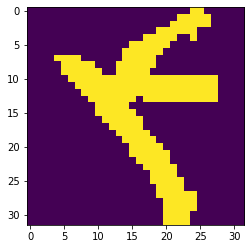

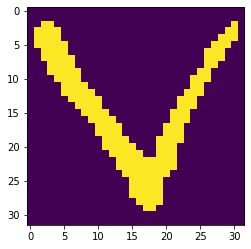

In [3]:
plt.imshow(train_images[23])
plt.show()
plt.imshow(train_images[88])
plt.show()

In [4]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 1)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 1)
input_shape = (32, 32, 1)

In [5]:
train_images = train_images /255.0
test_images = test_images /255.0

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8,4,activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(1,1)),
    tf.keras.layers.Conv2D(4,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(1,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 8)         136       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 4)         292       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               320128    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images,train_labels,batch_size=32,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2857 - accuracy: 0.9174
Epoch 2/2
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1067 - accuracy: 0.9683


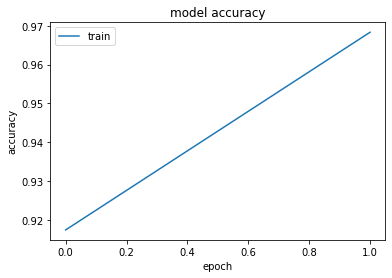

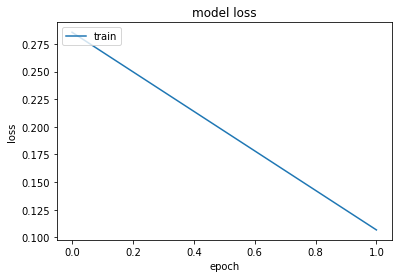

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [9]:
result = model.evaluate(test_images,test_labels)
print("accuracy on test data: ",result[1])

625/625 [==============================] - 7s 11ms/step - loss: 0.1663 - accuracy: 0.9509
accuracy on test data:  0.9509000182151794


In [10]:
predictions = model.predict(test_images)


some predictions by model :



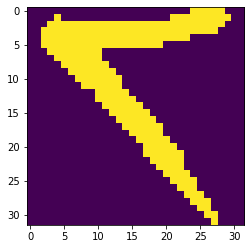

actual class:  2.0
model's prediction :  2


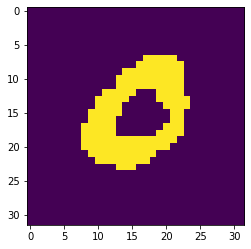

actual class:  0.0
model's prediction :  0


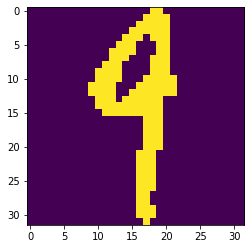

actual class:  9.0
model's prediction :  9


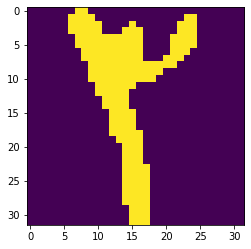

actual class:  3.0
model's prediction :  3


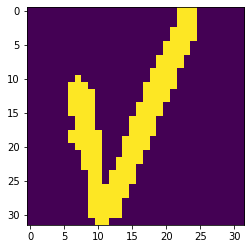

actual class:  7.0
model's prediction :  7


In [20]:
print("\nsome predictions by model :\n")
for i in range(5):
    index = np.random.randint(0,len(test_images))
    plt.imshow(test_images[index])
    plt.show()
    print("actual class: ",test_labels[index])
    print("model's prediction : ",np.argmax(predictions[index]))